# In this note book we will be covering following topics:
    
1.Importing Python Modules

2.Importing Dataset

3.Data Description

4.Clustering using KMeans



In [1]:
# Importing libraries required for this notebook
import numpy as np   # Used for Linear algebra
import pandas as pd  # Used for Data Manipulation and analysis 
import matplotlib.pyplot as plt   # Used for Data visualization & graphical plotting 
import seaborn as sns     # Data visualization library based on matplotlib,it provides a high level interface for drawing & informative statistical graphics
%matplotlib inline
from sklearn.cluster import KMeans   # Unsupervised machine learning algorithm.

## Importing Dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
iris_df.head() # Used to returns first 5 rows of data frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.info()  # information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris_df.shape  # shape of the data set

(150, 4)

In [6]:
iris_df.isnull().sum()    # finding any null values in data set 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
X=iris_df.iloc[ : , [0, 1, 2, 3]].values        # we will extract the data from columns we need.

## K-Means Model 

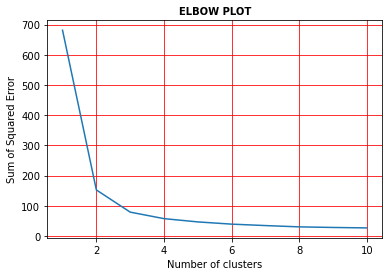

In [8]:
error=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    
    kmeans.fit(X)
    error.append(kmeans.inertia_)
    
plt.plot(range(1,11),error)
plt.title("ELBOW PLOT",fontweight="bold",size=10)
plt.xlabel("Number of clusters", fontweight='light',size=10)
plt.ylabel("Sum of Squared Error",fontweight="light",size=10)
plt.grid(color="r")
plt.show()


### From the above elbow graph we choose number clusters as  *3*

####  Applying KMeans to the data set 

In [9]:
kmeans=KMeans(n_clusters=3, init = 'k-means++', max_iter=300 , n_init=10, random_state=10)
y_kmeans=kmeans.fit_predict(X)

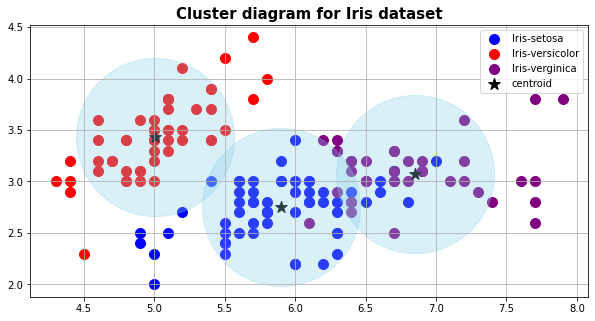

In [26]:
## Visualizing the cluster
plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='blue',label="Iris-setosa")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='red',label='Iris-versicolor')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c="purple",label="Iris-verginica")

# Plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c="black",label="centroid",marker="*")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=25000,c="skyblue",alpha=0.3)
plt.title("Cluster diagram for Iris dataset",fontweight="bold",size=15)
plt.grid()
plt.legend()
plt.show()